# Bank Marketing

This data is related to direct marketing campaigns of portuguse banking institution

main aim of this classification problem is "To Predict if the client will subscribe a term deposit"

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
eps = np.finfo(float).eps
from numpy import log2 as log

In [48]:
bank_data1=pd.read_excel("Bank_file1.xlsx")

In [3]:
bank_data1.head()

,ID,age,job,marital,education
0,C1,30,blue-collar,married,basic.9y
1,C2,39,services,single,high.school
2,C3,25,services,married,high.school
3,C4,38,services,married,basic.9y
4,C5,47,admin.,married,university.degree


In [4]:
bank_data2=pd.read_excel("Bank_file2.xlsx")

In [5]:
bank_data2.head()

,ID,default,housing,loan,contact,month
0,C1,no,yes,no,cellular,may
1,C2,no,no,no,telephone,may
2,C3,no,yes,no,telephone,jun
3,C4,no,unknown,unknown,telephone,jun
4,C5,no,yes,no,cellular,nov


In [6]:
bank_data3=pd.read_excel("Bank_file3.xlsx")

In [7]:
bank_data3.head()

,ID,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,C1,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,C2,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,C3,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,C4,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,C5,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [8]:
bank_target=pd.read_excel("Bank_target file.xlsx")

In [9]:
bank_target.head()

,ID,approved
0,C1,no
1,C2,no
2,C3,no
3,C4,no
4,C5,no


In [10]:
bank_data1.shape

(4119, 5)

In [11]:
bank_data2.shape

(4119, 6)

In [12]:
bank_data3.shape

(4119, 12)

In [13]:
bank_target.shape

(4119, 2)

In [14]:
bank_merge=pd.merge(bank_data1,bank_data2,on='ID')

In [15]:
bank_merge.head()

,ID,age,job,marital,education,default,housing,loan,contact,month
0,C1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may
1,C2,39,services,single,high.school,no,no,no,telephone,may
2,C3,25,services,married,high.school,no,yes,no,telephone,jun
3,C4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun
4,C5,47,admin.,married,university.degree,no,yes,no,cellular,nov


In [16]:
bank_semi_file=pd.merge(bank_merge,bank_data3,on='ID')

In [17]:
bank_semi_file.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,C1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,...,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,C2,39,services,single,high.school,no,no,no,telephone,may,...,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,C3,25,services,married,high.school,no,yes,no,telephone,jun,...,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,C4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,...,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,C5,47,admin.,married,university.degree,no,yes,no,cellular,nov,...,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [18]:
bank_final_merge=pd.merge(bank_semi_file,bank_target,on='ID')

In [19]:
bank_final_merge.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved
0,C1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,C2,39,services,single,high.school,no,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,C3,25,services,married,high.school,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,C4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,C5,47,admin.,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [20]:
bank_final_merge.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'approved'],
      dtype='object')

In [21]:
bank_final_merge.dtypes

ID                 object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
approved           object
dtype: object

In [22]:
bank_final_merge.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
approved          0
dtype: int64

In [23]:
bank_final_merge.nunique()

ID                4119
age                 67
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration           828
campaign            25
pdays               21
previous             7
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          234
nr.employed         11
approved             2
dtype: int64

In [24]:
bank_final_merge.duplicated().sum()

0

In [25]:
# Type conversion
bank_final_merge[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]=bank_final_merge[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].astype('int64')

In [26]:
bank_final_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.0,32.0,38.0,47.0,88.0
duration,4119.0,256.788055,254.703736,0.0,103.0,181.0,317.0,3643.0
campaign,4119.0,2.537266,2.568159,1.0,1.0,2.0,3.0,35.0
pdays,4119.0,960.422190,191.922786,0.0,999.0,999.0,999.0,999.0
previous,4119.0,0.190337,0.541788,0.0,0.0,0.0,0.0,6.0
emp.var.rate,4119.0,0.152464,1.115289,-3.0,-1.0,1.0,1.0,1.0
cons.price.idx,4119.0,92.924496,0.601423,92.0,93.0,93.0,93.0,94.0
cons.conf.idx,4119.0,-40.114348,4.615712,-50.0,-42.0,-41.0,-36.0,-26.0
euribor3m,4119.0,2.924011,1.569749,0.0,1.0,4.0,4.0,5.0
nr.employed,4119.0,5166.287934,73.748695,4963.0,5099.0,5191.0,5228.0,5228.0


In [27]:
bank_final_merge.describe(include='O').T

,count,unique,top,freq
ID,4119,4119,C1,1
job,4119,12,admin.,1012
marital,4119,4,married,2509
education,4119,8,university.degree,1264
default,4119,3,no,3315
housing,4119,3,yes,2175
loan,4119,3,no,3349
contact,4119,2,cellular,2652
month,4119,10,may,1378
day_of_week,4119,5,thu,860


In [29]:
bank_final_merge.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.029775,0.038498,0.096691,-0.023931,-0.042064
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.027816,0.001195,-0.032906,-0.030690,-0.044235
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.170632,0.102680,0.014300,0.145060,0.161281
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.290111,-0.010287,-0.093334,0.326431,0.382365
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.419375,-0.063201,-0.056161,-0.465823,-0.515327
emp.var.rate,-0.029775,-0.027816,0.170632,0.290111,-0.419375,1.000000,0.591348,0.140706,0.926380,0.889531
cons.price.idx,0.038498,0.001195,0.102680,-0.010287,-0.063201,0.591348,1.000000,0.087516,0.502701,0.381387
cons.conf.idx,0.096691,-0.032906,0.014300,-0.093334,-0.056161,0.140706,0.087516,1.000000,0.211892,0.115427
euribor3m,-0.023931,-0.030690,0.145060,0.326431,-0.465823,0.926380,0.502701,0.211892,1.000000,0.948740
nr.employed,-0.042064,-0.044235,0.161281,0.382365,-0.515327,0.889531,0.381387,0.115427,0.948740,1.000000


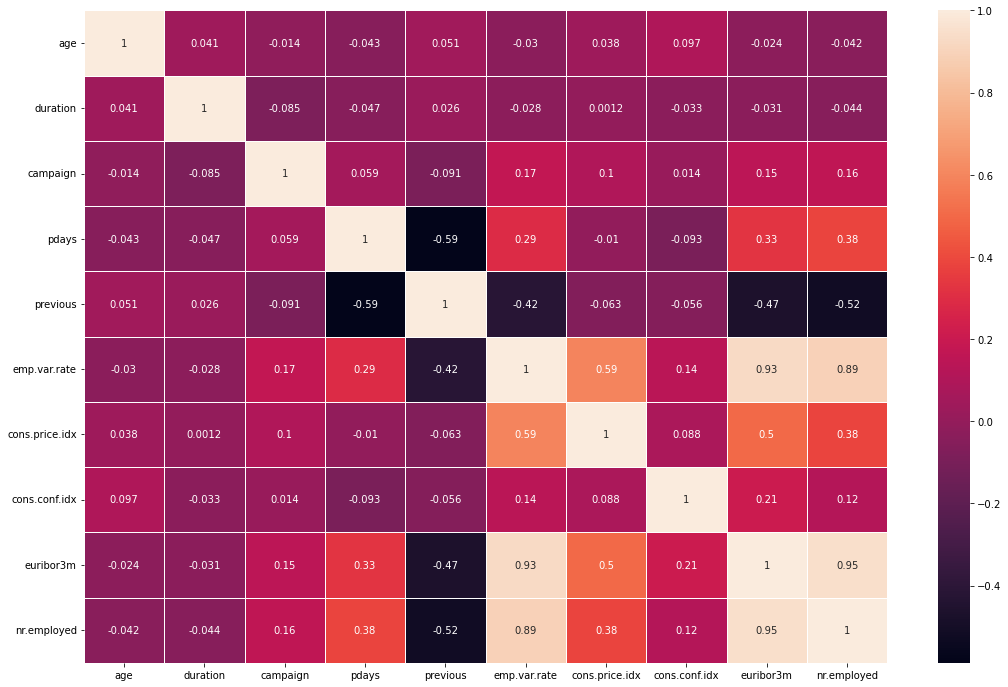

In [30]:
plt.figure(figsize = (18, 12))
sns.heatmap(data =bank_final_merge.corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [38]:
# BAsed on highely correlated and unique values we have drop some attributes

bank_final_merge.drop(["ID","euribor3m","emp.var.rate"],axis=1,inplace=True)

In [39]:
bank_final_merge.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,approved
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,92,-46,5099,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,93,-36,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,94,-41,5228,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,94,-41,5228,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,93,-42,5195,no


In [57]:
import plotly.express as px

plt.figure(figsize=[10,10])
fig = px.pie(bank_final_merge,names='approved')
fig.show()

print(bank_final_merge['approved'].value_counts(normalize=True))

no     0.890507
yes    0.109493
Name: approved, dtype: float64


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='loan', ylabel='count'>

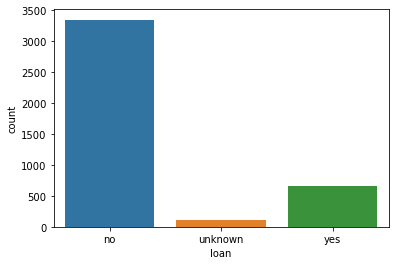

In [60]:
sns.countplot('loan',data=bank_final_merge)

<AxesSubplot:xlabel='marital', ylabel='count'>

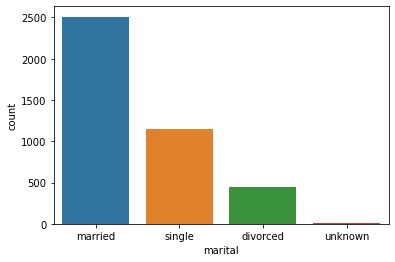

In [61]:
sns.countplot('marital',data=bank_final_merge)

<AxesSubplot:xlabel='loan', ylabel='count'>

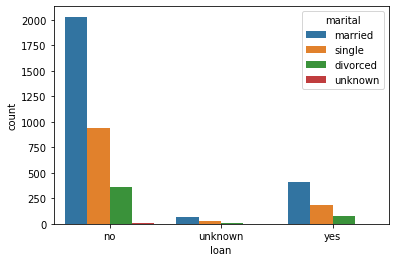

In [51]:
sns.countplot('loan',hue='marital',data=bank_final_merge)

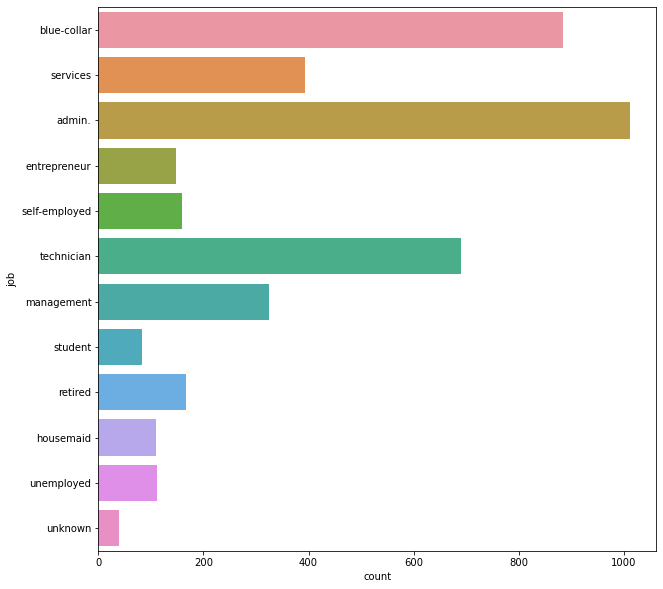

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(y=bank_final_merge['job'])
plt.show()

Text(0.5, 1.0, 'Age Distribution')

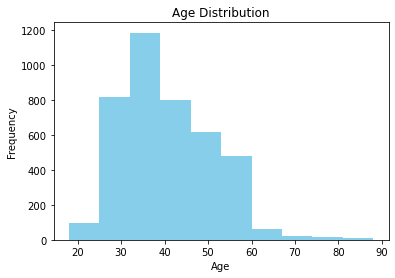

In [56]:
age_col=bank_final_merge['age']
plt.hist(age_col, bins=10, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

<AxesSubplot:xlabel='approved', ylabel='count'>

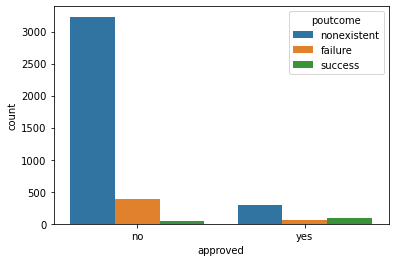

In [59]:
sns.countplot('approved',hue='poutcome',data=bank_final_merge)

In [68]:
bank_final_merge['approved'] = bank_final_merge['approved'].map({"no":0,"yes":1})

In [70]:
bank_final_merge.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,approved
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,92,-46,5099,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,93,-36,5191,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,94,-41,5228,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,94,-41,5228,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,93,-42,5195,0


In [76]:
# combine similar jobs into categories

bank_final_merge['job']=bank_final_merge['job'].replace(['admin.','management','entrepreneur','technician'],'white-collar')
bank_final_merge['job']=bank_final_merge['job'].replace(['services','housemaid'],'red-collar')
bank_final_merge['job']=bank_final_merge['job'].replace(['retired','self-employed','unemployed','student','unknown'],'others')


In [84]:
bank_final_merge["default"]
bank_final_merge['default_cat'] = bank_final_merge['default'].map( {'yes':1, 'no':0} )
bank_final_merge.drop('default', axis=1,inplace = True)

In [85]:
bank_final_merge["housing_cat"]=bank_final_merge['housing'].map({'yes':1, 'no':0})
bank_final_merge.drop('housing', axis=1,inplace = True)

In [86]:
bank_final_merge["loan_cat"]=bank_final_merge['loan'].map({'yes':1, 'no':0})
bank_final_merge.drop('loan', axis=1,inplace = True)

In [87]:
# dropping some attributes
bank_final_merge.drop(["contact","month","day_of_week"],axis=1,inplace=True)

In [88]:
bank_final_merge.head()

,age,job,marital,education,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,approved,default_cat,housing_cat,loan_cat
0,30,blue-collar,married,basic.9y,487,2,999,0,nonexistent,92,-46,5099,0,0.0,1.0,0.0
1,39,red-collar,single,high.school,346,4,999,0,nonexistent,93,-36,5191,0,0.0,0.0,0.0
2,25,red-collar,married,high.school,227,1,999,0,nonexistent,94,-41,5228,0,0.0,1.0,0.0
3,38,red-collar,married,basic.9y,17,3,999,0,nonexistent,94,-41,5228,0,0.0,NaN,NaN
4,47,white-collar,married,university.degree,58,1,999,0,nonexistent,93,-42,5195,0,0.0,1.0,0.0


In [90]:
null_values=bank_final_merge.isnull().sum().sort_values(ascending=False)
percentage=null_values/len(bank_final_merge)*100
df_null=pd.DataFrame({'Null':null_values,'Percentage':percentage})

In [91]:
df_null

,Null,Percentage
default_cat,803,19.495023
housing_cat,105,2.549162
loan_cat,105,2.549162
age,0,0.000000
job,0,0.000000
marital,0,0.000000
education,0,0.000000
duration,0,0.000000
campaign,0,0.000000
pdays,0,0.000000


In [92]:
bank_final_merge.isnull().sum()

age                 0
job                 0
marital             0
education           0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
cons.price.idx      0
cons.conf.idx       0
nr.employed         0
approved            0
default_cat       803
housing_cat       105
loan_cat          105
dtype: int64

In [93]:
bank_final_merge.dtypes

age                 int64
job                object
marital            object
education          object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
cons.price.idx      int64
cons.conf.idx       int64
nr.employed         int64
approved            int64
default_cat       float64
housing_cat       float64
loan_cat          float64
dtype: object

In [101]:
bank_final_merge['default_cat'].fillna(bank_final_merge['default_cat'].median(),inplace=True)

In [102]:
bank_final_merge['housing_cat'].fillna(bank_final_merge['housing_cat'].median(),inplace=True)

In [106]:
bank_final_merge['loan_cat'].fillna(bank_final_merge['loan_cat'].median(),inplace=True)

In [107]:
bank_final_merge.isnull().sum()

age               0
job               0
marital           0
education         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
approved          0
default_cat       0
housing_cat       0
loan_cat          0
dtype: int64

In [111]:
def one_hot_encoding(data,variable):
    unique_values = data[variable].unique()
    one_hot_dict = {}
    for value in unique_values:
        new_column = f"{variable}_{value}"
        data[new_column] = 0
        one_hot_dict[value] = new_column
    for index, row in data.iterrows():
        value = row[variable]
        new_column = one_hot_dict[value]
        data.at[index, new_column] = 1
#         data = data.drop(variable, axis=1)
    return data

In [112]:
cat_cols=['job','marital','education','poutcome']

In [114]:
for i in cat_cols:
    bank_final_merge=one_hot_encoding(bank_final_merge,i)
    bank_final_merge=bank_final_merge.drop(i,1)

In [116]:
bank_final_merge.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'approved', 'default_cat',
       'housing_cat', 'loan_cat', 'job_blue-collar', 'job_red-collar',
       'job_white-collar', 'job_others', 'marital_married', 'marital_single',
       'marital_divorced', 'marital_unknown', 'education_basic.9y',
       'education_high.school', 'education_university.degree',
       'education_professional.course', 'education_basic.6y',
       'education_basic.4y', 'education_unknown', 'education_illiterate',
       'poutcome_nonexistent', 'poutcome_failure', 'poutcome_success'],
      dtype='object')

In [117]:
bank_final_merge["approved"] = bank_final_merge.pop("approved")

In [118]:
bank_final_merge.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,default_cat,housing_cat,...,education_university.degree,education_professional.course,education_basic.6y,education_basic.4y,education_unknown,education_illiterate,poutcome_nonexistent,poutcome_failure,poutcome_success,approved
0,30,487,2,999,0,92,-46,5099,0.0,1.000000,...,0,0,0,0,0,0,1,0,0,0
1,39,346,4,999,0,93,-36,5191,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,25,227,1,999,0,94,-41,5228,0.0,1.000000,...,0,0,0,0,0,0,1,0,0,0
3,38,17,3,999,0,94,-41,5228,0.0,0.541854,...,0,0,0,0,0,0,1,0,0,0
4,47,58,1,999,0,93,-42,5195,0.0,1.000000,...,1,0,0,0,0,0,1,0,0,0


In [121]:
from sklearn.model_selection import train_test_split
X=bank_final_merge.drop('approved',axis=1)
y=bank_final_merge['approved']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [123]:
X_train.shape

(2883, 30)

In [124]:
y_train.shape

(2883,)

In [125]:
y_train

929     0
776     0
2469    0
3645    1
103     0
       ..
1593    1
4060    0
1346    0
3454    0
3582    0
Name: approved, Length: 2883, dtype: int64

In [126]:
len(y_train)
print('Y Target Size:', len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))

Y Target Size: 2883
X Train Size: 2883
X Test  Size: 1236
Y Target Size: 1236


In [127]:
list1=[]

def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
        list1.append(entropy)
    return list1[1]

In [128]:
find_entropy(bank_final_merge)

0.49838357284086277

In [129]:
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]#To make the code generic, changing target variable class name
    target_variables = df[Class].unique()
    variables = df[attribute].unique()
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
            fraction2 = den/len(df)
            entropy2 += -fraction2*entropy
            return abs(entropy2)

In [133]:
find_entropy_attribute(bank_final_merge,'duration')

0.23033711495360845

In [134]:
def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]

In [135]:
find_winner(bank_final_merge)

'duration'

In [142]:
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None): 
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
   #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['approved'],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

In [143]:
buildTree(bank_final_merge,tree=None)

{'duration': {0: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 0,
  21: 0,
  22: 0,
  23: 0,
  24: 0,
  25: 0,
  26: 0,
  27: 0,
  28: 0,
  29: 0,
  30: 0,
  31: 0,
  32: 0,
  33: 0,
  34: 0,
  35: 0,
  36: 0,
  37: 0,
  38: 0,
  39: 0,
  40: 0,
  41: 0,
  42: 0,
  43: 0,
  44: 0,
  45: 0,
  46: 0,
  47: 0,
  48: 0,
  49: 0,
  50: 0,
  51: 0,
  52: 0,
  53: 0,
  54: 0,
  55: 0,
  56: 0,
  57: 0,
  58: 0,
  59: 0,
  60: 0,
  61: 0,
  62: 0,
  63: {'age': {28: 1,
    30: 0,
    33: 0,
    34: 0,
    37: 0,
    38: 1,
    42: 0,
    46: 0,
    48: 0,
    53: 0,
    55: 0}},
  64: {'age': {27: 0,
    29: 0,
    31: 0,
    34: 0,
    38: 1,
    45: 0,
    46: 0,
    48: 0,
    51: 0,
    53: 0,
    55: 0,
    58: 0}},
  65: 0,
  66: 0,
  67: 0,
  68: 0,
  69: 0,
  70: 0,
  71: 0,
  72: 0,
  73: 0,
  74: 0,
  75: 0,
  76: 0,
  77: 0,
  78: {'age': {26: 0,
    28: 1,
    30: 0,
    32: 0,
    

In [144]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')

In [145]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [146]:
y_pred = clf.predict(X_train)

In [147]:
def evaluate_model(act, pred):
    print("Accurcay : ", accuracy_score(act, pred))

In [148]:
from sklearn.metrics import  accuracy_score


print("--Train--")
evaluate_model(y_train, y_pred)

--Train--
Accurcay :  1.0


In [165]:
clf.set_params(
    criterion='entropy',  # Splitting criteria
    max_depth=4,  # Maximum depth
    min_samples_split=2,  # Minimum number of samples required to split a node
    min_impurity_decrease=0.0,  # Minimum information gain required to split a node
    max_features=None,
)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [166]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [167]:
y_pred = clf.predict(X_train)

In [168]:
print("--Train--")
evaluate_model(y_train, y_pred)

--Train--
Accurcay :  0.927159209157128
